In [191]:
import pandas as pd
import numpy as np

# Set total rows
# total_rows = 1000
total_rows = 4840

# Generate severity data
severity = np.random.choice(
    ["Fatal", "Severe", "Minor"], 
    size=total_rows, 
    p=[0.21, 0.45, 0.34] 
)

def assign_gender(severity):
    if severity == "Fatal":
        return np.random.choice(["Male", "Female"], p=[0.84, 0.16])
    elif severity == "Severe":
        return np.random.choice(["Male", "Female"], p=[0.78, 0.22])
    else:  # severity == "Minor"
        return np.random.choice(["Male", "Female"], p=[0.70, 0.30])

# Function to assign age group based on severity
def assign_age(severity, transport):
    if transport == "Car Driver":
        return None  # Exclude "Car Driver"
    elif severity == "Fatal":
        return np.random.choice(
            ["1-17", "18-45", "46+"],
            p=[0.10, 0.70, 0.20]  # Adjusted to sum to 1
        )
    elif severity == "Severe":
        return np.random.choice(
            ["1-17", "18-45", "46+"],
            p=[0.11, 0.76, 0.13]  # These sum to 1
        )
    else:  # severity == "Minor"
        return np.random.choice(
            ["1-17", "18-45", "46+"],
            p=[0.11, 0.79, 0.10]  # These sum to 1
        )

def assign_transport(severity):
    if severity == "Fatal":
        return np.random.choice(
            ["Pedestrian", "Car Driver", "Motorcycle Driver", "Car Passenger", "Motorcycle Passenger", "Others"],
            p=[0.09, 0.03, 0.56, 0.08, 0.19, 0.05]
        )
    elif severity == "Severe":
        return np.random.choice(
            ["Pedestrian", "Car Driver", "Motorcycle Driver", "Car Passenger", "Motorcycle Passenger", "Others"],
            p=[0.06, 0.04, 0.49, 0.11, 0.27, 0.03]
        )
    else:  # severity == "Minor"
        return np.random.choice(
            ["Pedestrian", "Car Driver", "Motorcycle Driver", "Car Passenger", "Motorcycle Passenger", "Others"],
            p=[0.02, 0.04, 0.37, 0.20, 0.34, 0.03]
        )

def assign_job(severity):
    if severity == "Fatal":
        return np.random.choice(
            [
                "Police", "Students", "Soldiers", "Workers", "Children", "Businessmen", 
                "Foreigners", "Motorbike Drivers", "Farmers", "Fishermen", "Taxi Drivers",
                "Teachers", "Civil Servants", "Housewives", "Unemployed", "Others", "Unknown"
            ],
            p=[
                0.008, 0.092, 0.022, 0.235, 0.039, 0.045, 
                0.01, 0.019, 0.431, 0.005, 0.011,
                0.008, 0.016, 0.009, 0.007, 0.027, 0.016
            ]
        )
    elif severity == "Severe":
        return np.random.choice(
            [
                "Police", "Students", "Soldiers", "Workers", "Children", "Businessmen", 
                "Foreigners", "Motorbike Drivers", "Farmers", "Fishermen", "Taxi Drivers",
                "Teachers", "Civil Servants", "Housewives", "Unemployed", "Others", "Unknown"
            ],
            p=[
                0.004, 0.133, 0.023, 0.214, 0.025, 0.039, 
                0.014, 0.021, 0.427, 0.001, 0.016,
                0.006, 0.014, 0.008, 0.003, 0.016, 0.022
            ]
        )
    else:  # severity == "Minor"
        return np.random.choice(
            [
                "Police", "Students", "Soldiers", "Workers", "Children", "Businessmen", 
                "Foreigners", "Motorbike Drivers", "Farmers", "Fishermen", "Taxi Drivers",
                "Teachers", "Civil Servants", "Housewives", "Unemployed", "Others", "Unknown"
            ],
            p=[
                0.0007, 0.1149, 0.0105, 0.2276, 0.0270, 0.0270, 
                0.0345, 0.0128, 0.3403, 0.0023, 0.0330, 
                0.0030, 0.0068, 0.0075, 0.0015, 0.0545, 0.0961
            ]
        )

def assign_human_factor(role):
    if role == "Car Driver":
        # For Car Drivers, include the special case for "Using the wrong lane"
        return np.random.choice(
            [
                "Speeding", "Disregarding traffic signs", "Disregarding rights of way",
                "Not staying right", "Overtaking improperly", "Turning left/right improperly",
                "Drunk driving", "Drug use", "Health issues", "Using the wrong lane", "Other"
            ],
            p=[
                0.4625, 0.0046, 0.1300, 0.0695, 0.1119, 0.0700,
                0.1350, 0.0, 0.0100, 0.0010, 0.0055  # Adjusted to ensure the sum is exactly 1.0
            ]
        )
    else:
        # For other roles, exclude "Using the wrong lane"
        return np.random.choice(
            [
                "Speeding", "Disregarding traffic signs", "Disregarding rights of way",
                "Not staying right", "Overtaking improperly", "Turning left/right improperly",
                "Drunk driving", "Drug use", "Health issues", "Other"
            ],
            p=[
                0.4625, 0.0046, 0.1300, 0.0695, 0.1119, 0.0700,
                0.1350, 0.0, 0.0100, 0.0065  # Adjusted to ensure the sum is exactly 1.0
            ]
        )
        
def assign_helmet(transport):
    if transport in ["Motorcycle Driver", "Motorcycle Passenger"]:
        # Probabilities for wearing a helmet
        return np.random.choice(["Yes", "No"], p=[0.6, 0.4])  # 60% chance of wearing a helmet
    else:
        # For other transport types, helmet is not applicable
        return None



def assign_road_factor():
    return np.random.choice(
        ["Normal Road","Uneven Road", "Gravel Road", "Dirt Road", "Other Roads"],
        p=[0.9936, 0.0039, 0.0008, 0.0005, 0.0012]
    )

def assign_vehicle_factor():
    return np.random.choice(
        ["Normal", "Faulty Brakes", "Tire Blowout or Burst", "Faulty Lights", "Faulty Steering"],
        p=[0.9748, 0.0068, 0.0083, 0.0067, 0.0034]
    )

def assign_weather_factor():
    return np.random.choice(
        ["Rain", "Fog", "Snow", "Other"],
        p=[0.0017, 0.0, 0.0, 0.0]
    )
    
def assign_weather_factor():
    return np.random.choice(
        ["Normal", "Rain"],
        p=[0.9983, 0.0017]
    )

def assign_road_type():
    return np.random.choice(
        ["National Roads (NR)", "Provincial Roads (PR)", "Rural Roads", "Other Roads"],
        p=[0.4828, 0.2812, 0.1343, 0.1012]
    )
    
def assign_accident_type(transport):
    if transport in ["Motorcycle Driver", "Motorcycle Passenger"]:
        # Motorcycle-related accident types
        return np.random.choice(
            [
                "Motorcycle vs. Motorcycle", "Motorcycle vs. Bicycle", "Motorcycle vs. Pedestrian",
                "Motorcycle vs. Car", "Motorcycle vs. Truck", "Motorcycle vs. Bus",
                "Motorcycle vs. Tuk-tuk", "Motorcycle vs. Trailer", "Motorcycle vs. Animal",
                "Motorcycle Fall", "Motorcycle vs. Other"
            ],
            p=[
                0.3244, 0.0311, 0.0674, 0.3001, 0.1207, 0.0072,
                0.0040, 0.0094, 0.0032, 0.0707, 0.0618
            ]
        )
    elif transport in ["Car Driver", "Car Passenger"]:
        # Car-related accident types
        return np.random.choice(
            [
                "Car vs. Car", "Car vs. Truck", "Car vs. Pedestrian",
                "Car vs. Motorcycle", "Car vs. Other", "Car vs. Animal",
                "Car Rollover"
            ],
            p=[
                0.3034, 0.1499, 0.1715, 0.0361, 0.1931, 0.0035, 0.1425
            ]
        )
    elif transport == "Truck":
        # Truck-related accident types
        return np.random.choice(
            [
                "Truck vs. Pedestrian", "Truck vs. Motorcycle", "Truck vs. Truck",
                "Truck vs. Trailer", "Truck vs. Animal", "Truck Rollover",
                "Truck vs. Other"
            ],
            p=[
                0.1737, 0.0057, 0.2280, 0.0543, 0.0165, 0.2393, 0.2825
            ]
        )
    else:  # Other transport types
        return np.random.choice(
            [
                "Other vs. Other", "Other vs. Pedestrian", "Other vs. Motorcycle"
            ],
            p=[
                0.2598, 0.3838, 0.3564
            ]
        )
        
def assign_time_of_day(severity):
    if severity == "Fatal":
        # Probabilities for Fatal severity
        return np.random.choice(
            ["Morning", "Afternoon", "Evening", "Night"],
            p=[0.1743, 0.25, 0.2457, 0.33]
        )
    elif severity == "Severe":
        # Probabilities for Severe severity
        return np.random.choice(
            ["Morning", "Afternoon", "Evening", "Night"],
            p=[0.15, 0.28, 0.23, 0.34]
        )
    else:  # severity == "Minor"
        # Probabilities for Minor severity
        return np.random.choice(
            ["Morning", "Afternoon", "Evening", "Night"],
            p=[0.18, 0.24, 0.22, 0.36]
        )
        
def assign_road_type():
    return np.random.choice(
        [
            "Straight Road", "Roundabout", "Curved Road", "Intersection",
            "T-Junction", "Bridge", "Curve", "Construction Zone"
        ],
        p=[
            0.7855, 0.0097, 0.0779, 0.0572,
            0.0426, 0.0136, 0.0116, 0.0019
        ]
    )


def assign_vehicle_speed(severity):
    if severity == "Fatal":
        # Higher speeds for Fatal severity
        return np.random.normal(loc=80, scale=10)  # Average speed 80 km/h, lower variability
    elif severity == "Severe":
        # Medium speeds for Severe severity
        return np.random.normal(loc=60, scale=15)  # Average speed 60 km/h, moderate variability
    else:  # severity == "Minor"
        # Lower speeds for Minor severity
        return np.random.normal(loc=40, scale=10)  # Average speed 40 km/h, lower variability


# Assign transport first, as it is used in ages
transport = [assign_transport(s) for s in severity]

# Assign other features
gender = [assign_gender(s) for s in severity]
ages = [assign_age(s, t) for s, t in zip(severity, transport)]
# job = [assign_job(s) for s in severity]
human_factors = [assign_human_factor(role) for role in transport]
road_factors = [assign_road_factor() for _ in range(total_rows)]
helmet = [assign_helmet(t) for t in transport]
vehicle_factors = [assign_vehicle_factor() for _ in range(total_rows)]
weather = [assign_weather_factor() for _ in range(total_rows)]
road_type = [assign_road_type() for _ in range(total_rows)]
collision = [assign_accident_type(role) for role in transport]
time_of_day = [assign_time_of_day(s) for s in severity]
vehicle_speed = [assign_vehicle_speed(s) for s in severity]

# vehicle_speed = np.random.normal(loc=60, scale=15, size=total_rows) 

# Create the DataFrame
data = pd.DataFrame({
    "Gender": gender,
    "Age": ages,
    # "Job": job,
    "Role": transport,
    # "Vehicle Type": vehicle_type,
    "Human Factors": human_factors,
    "Helmet": helmet,
    "Road Factors": road_factors,
    "vehicle Factors": vehicle_factors,
    "Weather": weather,
    "Road Type": road_type,
    "Collision": collision,
    "Time of Day": time_of_day,
    # "Road Condition": road_condition,
    # "Driver Behavior": driver_behavior,
    # "Accident Type": accident_type,
    "Vehicle Speed": vehicle_speed,
    "Severity": severity,
})

# Save to CSV
data.to_csv("synthetic_traffic_data.csv", index=False)

print("Synthetic dataset successfully created!")
print(data.head())


Synthetic dataset successfully created!
  Gender    Age               Role               Human Factors Helmet  \
0   Male  18-45         Pedestrian                    Speeding   None   
1   Male  18-45      Car Passenger               Drunk driving   None   
2   Male  18-45  Motorcycle Driver  Disregarding traffic signs    Yes   
3   Male   1-17      Car Passenger               Drunk driving   None   
4   Male  18-45      Car Passenger                    Speeding   None   

  Road Factors vehicle Factors Weather      Road Type  \
0  Normal Road          Normal  Normal  Straight Road   
1  Normal Road          Normal  Normal    Curved Road   
2  Normal Road          Normal  Normal  Straight Road   
3  Normal Road          Normal  Normal  Straight Road   
4  Normal Road          Normal  Normal  Straight Road   

                   Collision Time of Day  Vehicle Speed Severity  
0       Other vs. Pedestrian       Night      96.328557    Fatal  
1              Car vs. Other     Evening    

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [193]:
# Load the dataset
data = pd.read_csv("new_synthetic_traffic_data.csv")

# Check the first few rows
print(data.head())


  Gender    Age               Role               Human Factors Helmet  \
0   Male  18-45         Pedestrian                    Speeding    NaN   
1   Male  18-45      Car Passenger               Drunk driving    NaN   
2   Male  18-45  Motorcycle Driver  Disregarding traffic signs    Yes   
3   Male   1-17      Car Passenger               Drunk driving    NaN   
4   Male  18-45      Car Passenger                    Speeding    NaN   

  Road Factors vehicle Factors Weather      Road Type  \
0  Normal Road          Normal  Normal  Straight Road   
1  Normal Road          Normal  Normal    Curved Road   
2  Normal Road          Normal  Normal  Straight Road   
3  Normal Road          Normal  Normal  Straight Road   
4  Normal Road          Normal  Normal  Straight Road   

                   Collision Time of Day  Vehicle Speed Severity  
0       Other vs. Pedestrian       Night      96.328557    Fatal  
1              Car vs. Other     Evening      73.822428    Fatal  
2  Motorcycle vs.

C:\Users\User\AppData\Local\Temp\ipykernel_13596\3735039007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Severity", palette="viridis")


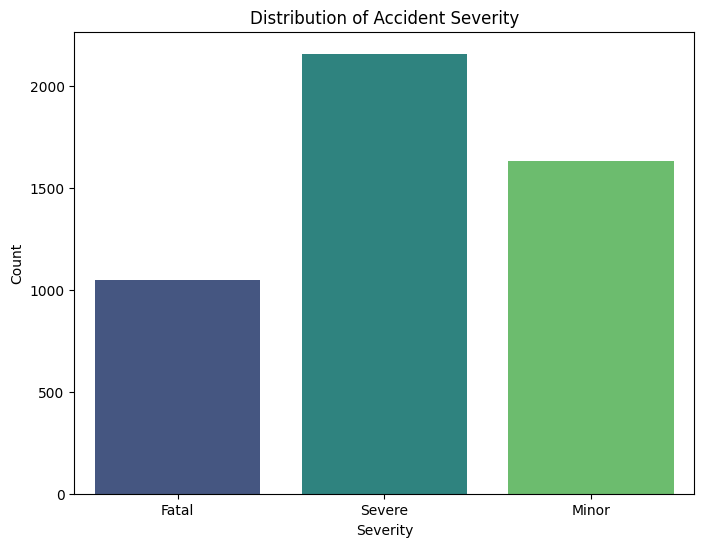

In [194]:
# Severity Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Severity", palette="viridis")
plt.title("Distribution of Accident Severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()


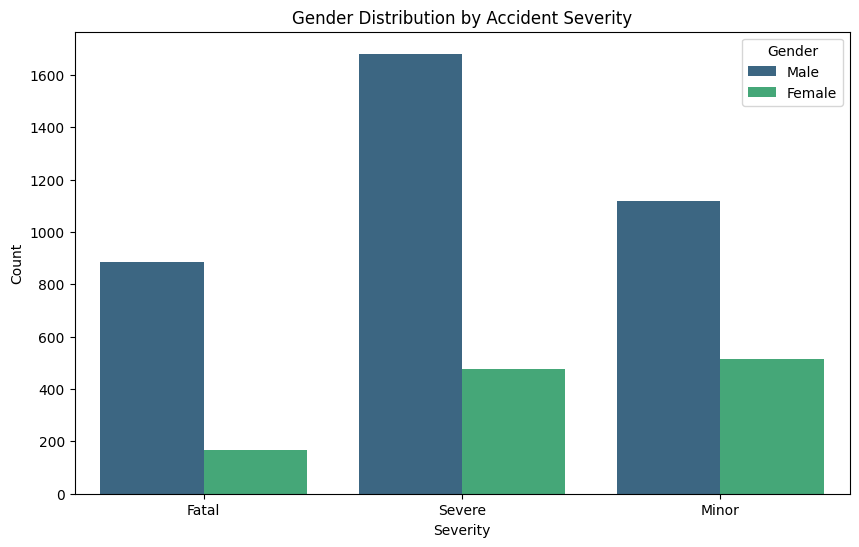

In [195]:
# Gender Distribution by Severity
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Severity", hue="Gender", palette="viridis")
plt.title("Gender Distribution by Accident Severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13596\3823541723.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Age", palette="coolwarm")


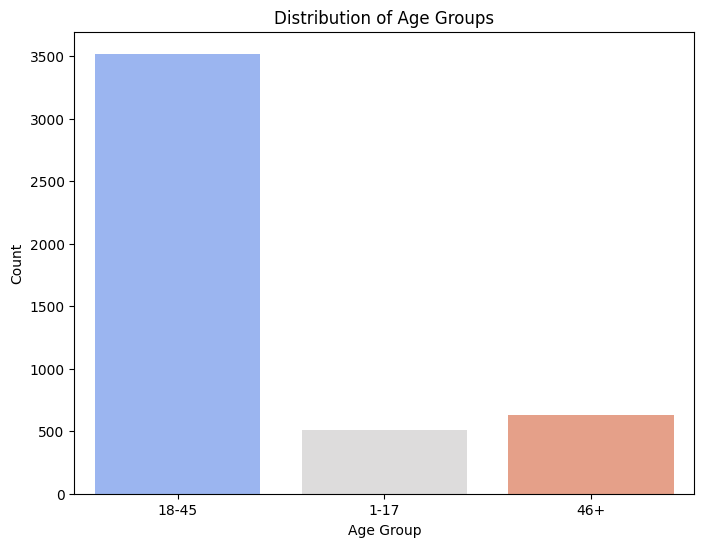

In [196]:
#Age Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Age", palette="coolwarm")
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13596\2811650085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Role", palette="mako")


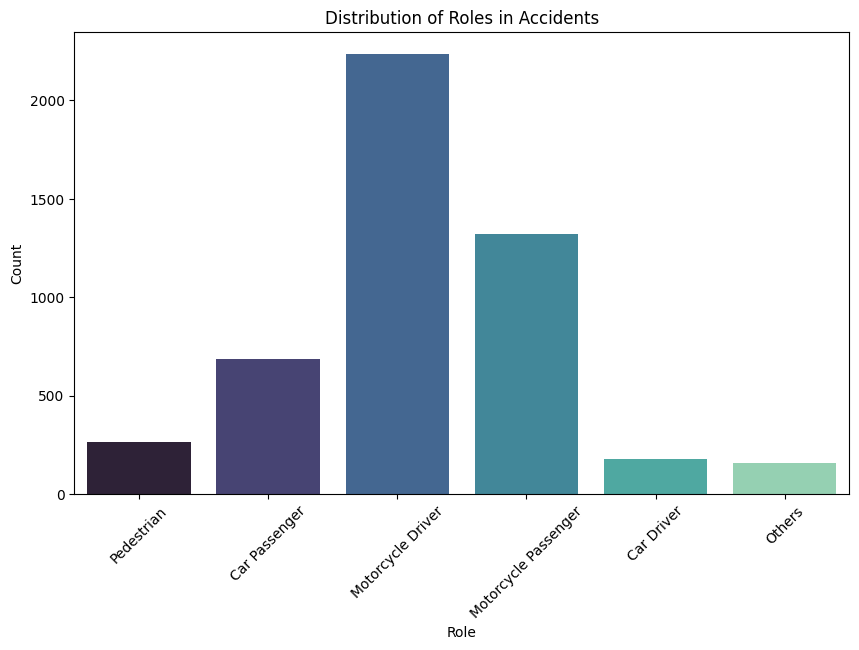

In [197]:
#Role Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Role", palette="mako")
plt.title("Distribution of Roles in Accidents")
plt.xlabel("Role")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13596\2816380500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Severity", y="Vehicle Speed", palette="pastel")


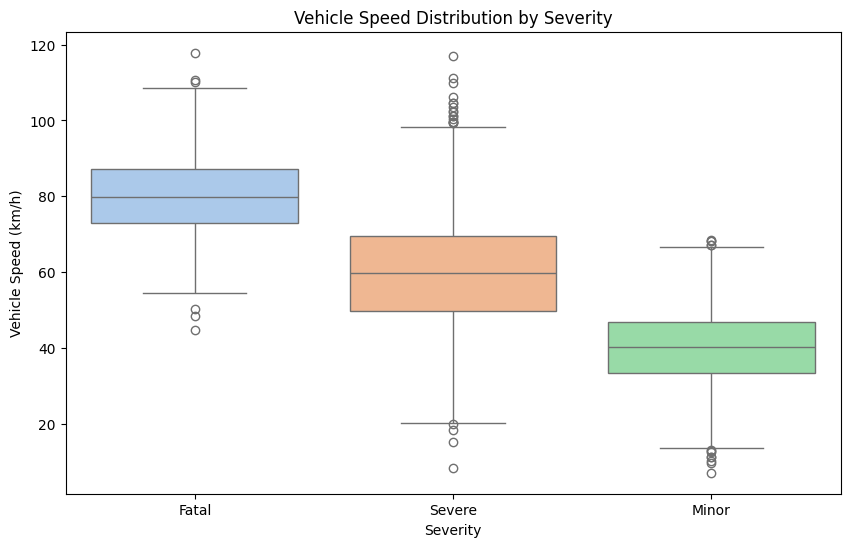

In [198]:
# Vehicle Speed by Severity
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Severity", y="Vehicle Speed", palette="pastel")
plt.title("Vehicle Speed Distribution by Severity")
plt.xlabel("Severity")
plt.ylabel("Vehicle Speed (km/h)")
plt.show()


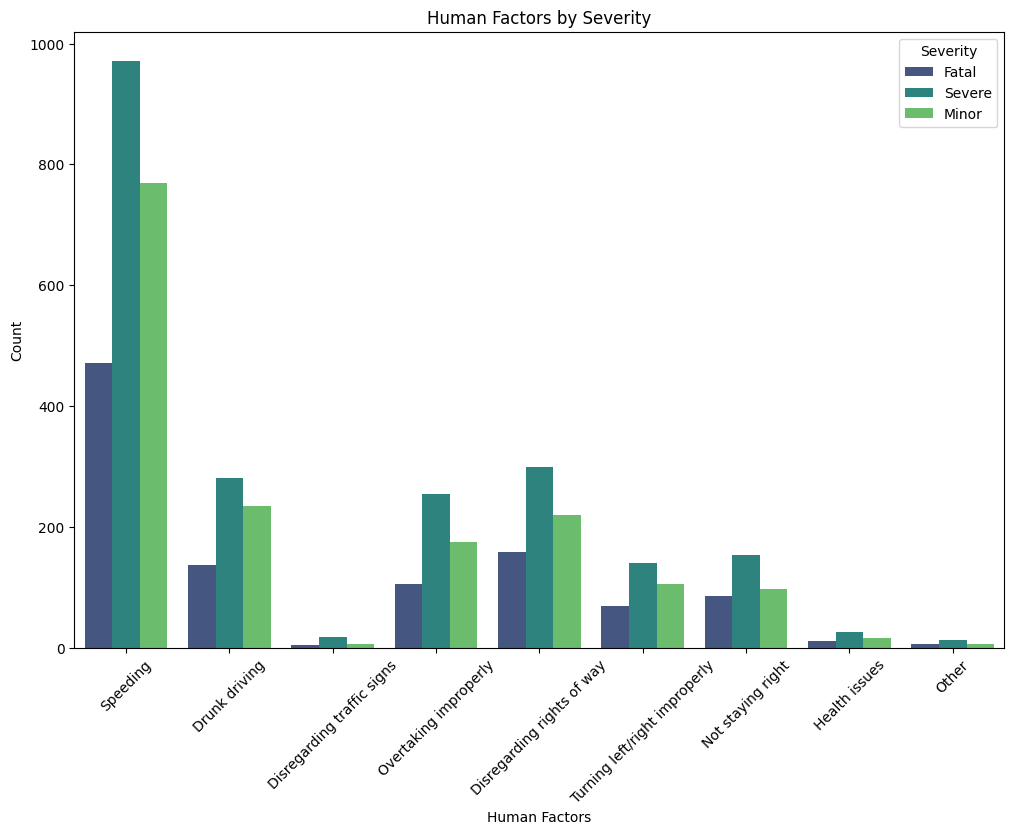

In [199]:
# Human Factors by Severity
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x="Human Factors", hue="Severity", palette="viridis")
plt.title("Human Factors by Severity")
plt.xlabel("Human Factors")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Severity")
plt.show()


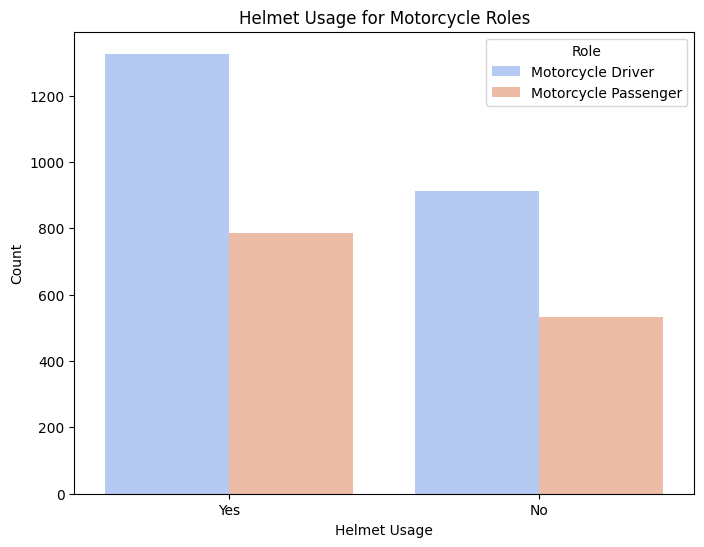

In [200]:
# Helmet Usage in Motorcycle Roles
motorcycle_roles = data[data["Role"].isin(["Motorcycle Driver", "Motorcycle Passenger"])]
plt.figure(figsize=(8, 6))
sns.countplot(data=motorcycle_roles, x="Helmet", hue="Role", palette="coolwarm")
plt.title("Helmet Usage for Motorcycle Roles")
plt.xlabel("Helmet Usage")
plt.ylabel("Count")
plt.legend(title="Role")
plt.show()


In [201]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode target variable (Severity)
label_encoder = LabelEncoder()
data["Severity"] = label_encoder.fit_transform(data["Severity"])

# Handle categorical columns with Label Encoding
categorical_columns = ["Age", "Helmet"]
for column in categorical_columns:
    if column in data.columns:
        data[column] = LabelEncoder().fit_transform(data[column])

# One-hot encode other categorical features
data = pd.get_dummies(data, columns=[
    "Gender", "Role", "Human Factors", "Road Factors", 
    "vehicle Factors", "Weather", "Road Type", "Collision", "Time of Day"
], drop_first=True)

# Define features (X) and target (y)
X = data.drop("Severity", axis=1)
y = data["Severity"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [202]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test_scaled).round().astype(int)
y_pred_linear = np.clip(y_pred_linear, 0, 2)  # Ensure predictions are within target range

# Evaluate
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.2f}")
print(classification_report(y_test, y_pred_linear, target_names=label_encoder.classes_))


Accuracy: 0.26
              precision    recall  f1-score   support

       Fatal       1.00      0.00      0.01       211
       Minor       0.27      0.69      0.39       332
      Severe       0.16      0.04      0.07       425

    accuracy                           0.26       968
   macro avg       0.48      0.25      0.16       968
weighted avg       0.38      0.26      0.17       968



In [203]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


Random Forest Results:
Accuracy: 0.69
              precision    recall  f1-score   support

       Fatal       0.74      0.62      0.67       211
       Minor       0.72      0.78      0.75       332
      Severe       0.65      0.65      0.65       425

    accuracy                           0.69       968
   macro avg       0.70      0.68      0.69       968
weighted avg       0.69      0.69      0.69       968



In [204]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate
print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))


SVM Results:
Accuracy: 0.68
              precision    recall  f1-score   support

       Fatal       0.76      0.53      0.63       211
       Minor       0.73      0.72      0.73       332
      Severe       0.62      0.72      0.66       425

    accuracy                           0.68       968
   macro avg       0.70      0.66      0.67       968
weighted avg       0.69      0.68      0.68       968



In [205]:
results = {
    "Linear Regression": accuracy_score(y_test, y_pred_linear),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm),
}

print("\nModel Comparison:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.2f}")



Model Comparison:
Linear Regression: 0.26
Random Forest: 0.69
SVM: 0.68


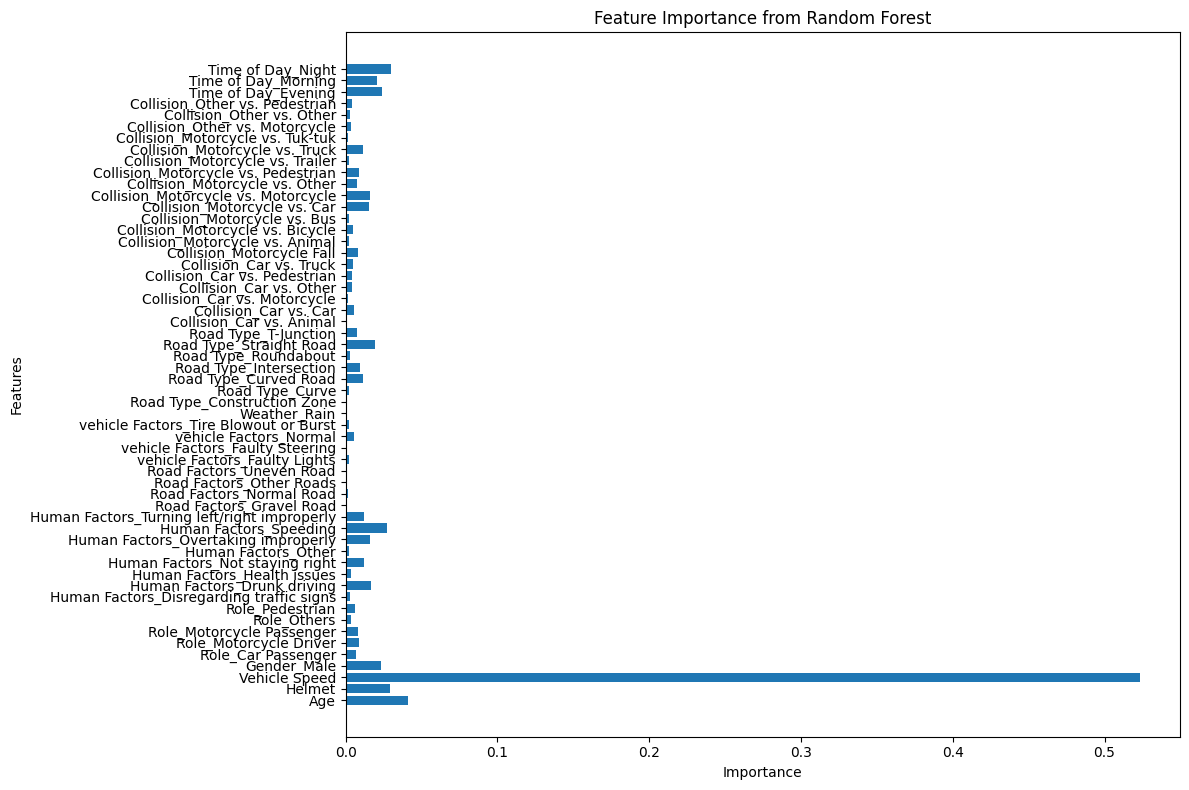

In [206]:
import matplotlib.pyplot as plt

# Feature importance from Random Forest
feature_importance = random_forest_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(12, 8))
plt.barh(features, feature_importance)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [207]:
# Store results in a dictionary
results = {
    "Linear Regression": accuracy_score(y_test, y_pred_linear),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm),
}

print("\nModel Comparison:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.2f}")



Model Comparison:
Linear Regression: 0.26
Random Forest: 0.69
SVM: 0.68


In [208]:
from sklearn.feature_selection import SelectKBest, chi2

# Select top K features
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)

# Print selected features
selected_features = selector.get_feature_names_out(input_features=X.columns)
print("Selected Features:", selected_features)


Selected Features: ['Vehicle Speed' 'Gender_Male' 'Role_Car Passenger'
 'Role_Motorcycle Driver' 'Role_Motorcycle Passenger' 'Role_Others'
 'Role_Pedestrian' 'Collision_Car vs. Car'
 'Collision_Other vs. Motorcycle' 'Collision_Other vs. Pedestrian']


In [209]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy: 0.6957675579493893


In [210]:
# Define hyperparameter grid for Random Forest
param_grid = {
    "n_estimators": [100, 200, 300],        # Number of trees in the forest
    "max_depth": [None, 10, 20, 30],       # Maximum depth of each tree
    "min_samples_split": [2, 5, 10],       # Minimum samples to split an internal node
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    param_grid, 
    cv=3, 
    scoring="accuracy", 
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

# Print best hyperparameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy from Grid Search:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy from Grid Search: 0.6957675579493893


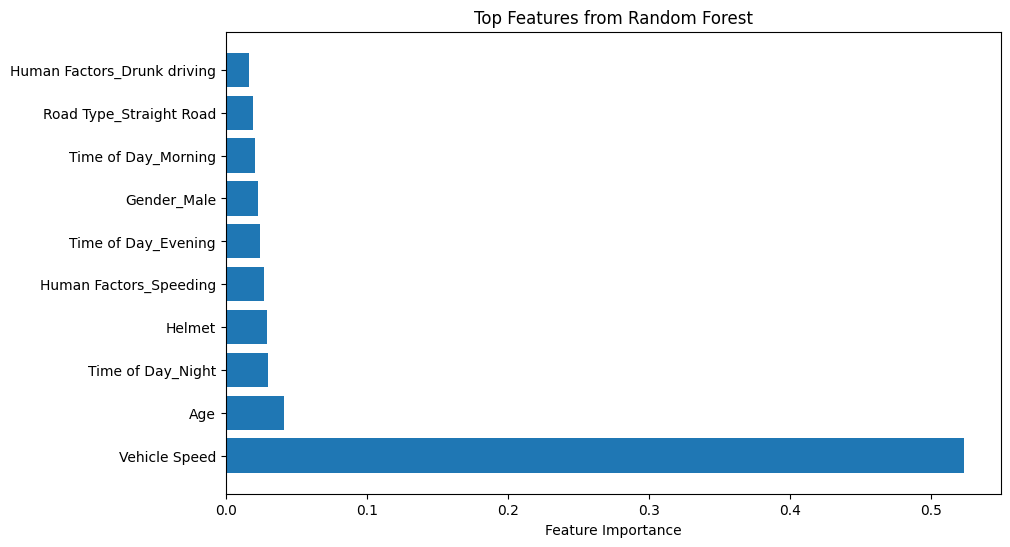

In [211]:
import matplotlib.pyplot as plt

feature_importances = random_forest_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
top_features = X.columns[sorted_idx][:10]

plt.figure(figsize=(10, 6))
plt.barh(top_features, feature_importances[sorted_idx][:10])
plt.xlabel("Feature Importance")
plt.title("Top Features from Random Forest")
plt.show()


In [215]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7086776859504132

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71       211
           1       0.72      0.83      0.77       332
           2       0.69      0.62      0.65       425

    accuracy                           0.71       968
   macro avg       0.71      0.72      0.71       968
weighted avg       0.71      0.71      0.71       968



In [214]:

random_forest_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6601239669421488

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.34      0.47       211
           1       0.71      0.85      0.77       332
           2       0.60      0.67      0.64       425

    accuracy                           0.66       968
   macro avg       0.68      0.62      0.63       968
weighted avg       0.67      0.66      0.65       968

